In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
ds = pd.read_excel('Data.xlsx')
ds

,Unnamed: 0,PPK 2021,RLS 2021,UHH 2021,HLS 2021,IPM 2021
0,ACEH,9572.0,9.37,69.96,14.36,72.18
1,Simeulue,7148.0,9.48,65.28,13.90,66.41
2,Aceh Singkil,8776.0,8.68,67.43,14.32,69.22
3,Aceh Selatan,8180.0,8.88,64.40,14.60,67.44
4,Aceh Tenggara,8030.0,9.67,68.22,14.01,69.44
...,...,...,...,...,...,...
548,INDONESIA,11156.0,8.54,71.57,13.08,72.29
549,NaN,NaN,NaN,NaN,NaN,NaN
550,Untuk penjelasan lebih lanjut mengenai IPM met...,NaN,NaN,NaN,NaN,NaN
551,Source Url: https://www.bps.go.id/indicator/26...,NaN,NaN,NaN,NaN,NaN


In [ ]:
ds.rename(columns = {"Unnamed: 0": "Daerah",
                     "PPK 2021": "PPK_2021",
                     "RLS 2021": "RLS_2021",
                     "UHH 2021": "UHH_2021",
                     "HLS 2021": "HLS_2021",
                     "IPM 2021": "IPM_2021"}, inplace=True)

In [ ]:
ds.dropna(inplace=True)
ds

,Daerah,PPK_2021,RLS_2021,UHH_2021,HLS_2021,IPM_2021
0,ACEH,9572.0,9.37,69.96,14.36,72.18
1,Simeulue,7148.0,9.48,65.28,13.90,66.41
2,Aceh Singkil,8776.0,8.68,67.43,14.32,69.22
3,Aceh Selatan,8180.0,8.88,64.40,14.60,67.44
4,Aceh Tenggara,8030.0,9.67,68.22,14.01,69.44
...,...,...,...,...,...,...
544,Dogiyai,5415.0,4.94,65.85,10.59,55.00
545,Intan Jaya,5328.0,3.09,65.69,7.66,48.34
546,Deiyai,4673.0,3.25,65.36,9.82,49.96
547,Kota Jayapura,14937.0,11.57,70.52,15.02,80.11


In [ ]:
x = ds[['PPK_2021','RLS_2021','UHH_2021','HLS_2021']].values
x

array([[9.5720e+03, 9.3700e+00, 6.9960e+01, 1.4360e+01],
       [7.1480e+03, 9.4800e+00, 6.5280e+01, 1.3900e+01],
       [8.7760e+03, 8.6800e+00, 6.7430e+01, 1.4320e+01],
       ...,
       [4.6730e+03, 3.2500e+00, 6.5360e+01, 9.8200e+00],
       [1.4937e+04, 1.1570e+01, 7.0520e+01, 1.5020e+01],
       [1.1156e+04, 8.5400e+00, 7.1570e+01, 1.3080e+01]])

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.28103656, 0.69675723, 0.65156951, 0.75305097],
       [0.15930092, 0.7063979 , 0.44170404, 0.72002872],
       [0.24106067, 0.63628396, 0.53811659, 0.75017947],
       ...,
       [0.03500402, 0.16038563, 0.44529148, 0.42713568],
       [0.55047208, 0.88957055, 0.67668161, 0.80043073],
       [0.36058658, 0.62401402, 0.72376682, 0.66116296]])

In [ ]:
kmeans = KMeans(n_clusters=3)
yclust = kmeans.fit_predict(x)
yclust

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0,

In [ ]:
kmeans.cluster_centers_

array([[0.19622077, 0.51127007, 0.4539664 , 0.60770149],
       [0.31506629, 0.60018391, 0.67700213, 0.64785755],
       [0.50852772, 0.81170628, 0.78564583, 0.75735118]])

In [ ]:
ds['cluster'] = yclust

In [ ]:
ds.to_excel('Label_65.xlsx')

[38.10363258125401, 24.10023592078211, 17.861926177199194, 14.001845410628324, 12.2907538087772, 10.947233683503153, 9.95590851216456, 9.157788103832317, 8.518608810741629]


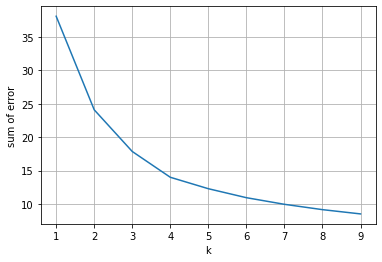

In [ ]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x)
    sse.append(km.inertia_)
print(sse)
plt.xlabel('k')
plt.ylabel('sum of error')
plt.plot(k_range, sse)
plt.grid()
plt.savefig('SSE5.png', dpi=500, bbox_inches='tight')

In [ ]:
ds['cluster'] = ds["cluster"].replace([0,1,2],["Rendah","Sedang","Kuat"])

In [ ]:
ds

,Daerah,PPK_2021,RLS_2021,UHH_2021,HLS_2021,IPM_2021,cluster
0,ACEH,9572.0,9.37,69.96,14.36,72.18,Sedang
1,Simeulue,7148.0,9.48,65.28,13.90,66.41,Rendah
2,Aceh Singkil,8776.0,8.68,67.43,14.32,69.22,Sedang
3,Aceh Selatan,8180.0,8.88,64.40,14.60,67.44,Rendah
4,Aceh Tenggara,8030.0,9.67,68.22,14.01,69.44,Sedang
...,...,...,...,...,...,...,...
544,Dogiyai,5415.0,4.94,65.85,10.59,55.00,Rendah
545,Intan Jaya,5328.0,3.09,65.69,7.66,48.34,Rendah
546,Deiyai,4673.0,3.25,65.36,9.82,49.96,Rendah
547,Kota Jayapura,14937.0,11.57,70.52,15.02,80.11,Kuat


In [ ]:
ds.to_excel('Cluster_65.xlsx')